<a href="https://colab.research.google.com/github/gptix/data-visualization/blob/master/Coal_Plant_Fuel_Efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualization of efficiency (MWh per ton of fuel) by power (MWh) in the United States in 2018.

*Last run from scratch, successfully, at 13:27 EST, 22 Nov 2019*

## Data Sources

U.S. Energy Information Administration

https://www.eia.gov/



**Form EIA-923**

"The survey Form EIA-923 collects detailed electric power data -- monthly and annually -- on electricity generation, fuel consumption, fossil fuel stocks, and receipts at the power plant and prime mover level."

https://www.eia.gov/electricity/data/eia923/

## Software

Data Manipulation: Pandas

Vizualization: Seaborn

Notebook Creation and coding: Google Colab

## Import great code.

In [0]:
# Import libraries probably needed.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
from numpy import linalg as la

import seaborn as sns

from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO
import os.path

import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from functools import reduce
from math import sqrt

import random
from statistics import mean, stdev

import plotly.graph_objects as go

## Ingest raw data.

In [0]:
url_base = "https://raw.githubusercontent.com/gptix/data-visualization/master/"

# set filenames
# Detailed data, including fuel type and annual production.
detail_filename = "EIA923_Schedules_2_3_4_5_M_12_2018_Final_Revision.csv"

# Plant data, including latitude and longitude.
plants_filename = "2___Plant_Y2018.csv"

detail_df = pd.read_csv(url_base + detail_filename)
plants_df = pd.read_csv(url_base + plants_filename, skiprows=1)

# detail_df.head(1)

## Shape data, including removing or altering "NaNs"

In [0]:
# extract needed data
# filter for rows related to use of coal as fuel.
fuel_type = 'COL'
detail_df = detail_df[detail_df.AER_Fuel_Type_Code.isin([fuel_type])]
# detail_df.shape

# Re-shape detail_df to contain only columns needed.
detail_columns = detail_df.columns
detail_columns_needed = ['Plant_Id', 'Reported_Prime_Mover', 'AER_Fuel_Type_Code', 
                         'Total_Fuel_Consumption_Quantity', 
                         'Total_Fuel_Consumption_MMBtu', 
                         'Net_Generation_(Megawatthours)']
detail_columns_to_drop = list(set(detail_columns) - set(detail_columns_needed))
detail_df = detail_df.drop(columns=detail_columns_to_drop)

# detail_df.columns
# detail_df.head(1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



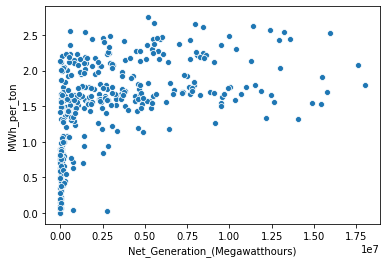

In [16]:
# create df that summarizes fuel use and power generation by Plant.
detail_summed_df = detail_df.groupby('Plant_Id').sum()
detail_summed_df.head(2)
detail_summed_df.Total_Fuel_Consumption_MMBtu
detail_summed_df.columns

# remove zero (or very small) rows (power output)
detail_summed_nonzero_df = detail_summed_df[detail_summed_df['Net_Generation_(Megawatthours)'] > 0.1]

# Copy df for exploration
dft = detail_summed_nonzero_df

# flatten
dft.reset_index(inplace=True)

# calculate efficiency metric
dft['MWh_per_ton'] = dft['Net_Generation_(Megawatthours)']/dft['Total_Fuel_Consumption_Quantity']

sns.scatterplot(dft['Net_Generation_(Megawatthours)'], dft['MWh_per_ton'])

Inefficient power plants are smaller in scale. 

Assuming that health effects depend on amount of coal burned, replacement of plants should commence with smaller plants.